## Mushroom Classification: Edible or Poisonous

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('mushrooms.csv')
df.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7565,p,k,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
6664,p,f,s,n,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
5745,p,x,y,n,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
3371,p,x,s,p,f,c,f,w,n,g,...,s,w,w,p,w,o,p,n,v,d
1684,e,f,s,w,f,n,f,w,b,p,...,f,w,w,p,w,o,e,k,s,g
3765,e,f,y,e,t,n,f,c,b,w,...,s,p,w,p,w,o,p,k,v,d
1435,e,x,f,n,t,n,f,c,b,u,...,s,g,p,p,w,o,p,k,y,d
1117,e,f,s,g,f,n,f,w,b,h,...,f,w,w,p,w,o,e,n,s,g
6709,p,f,y,n,f,f,f,c,n,b,...,k,p,w,p,w,o,e,w,v,p
5456,p,x,s,g,t,f,f,c,b,w,...,f,w,w,p,w,o,p,h,s,u


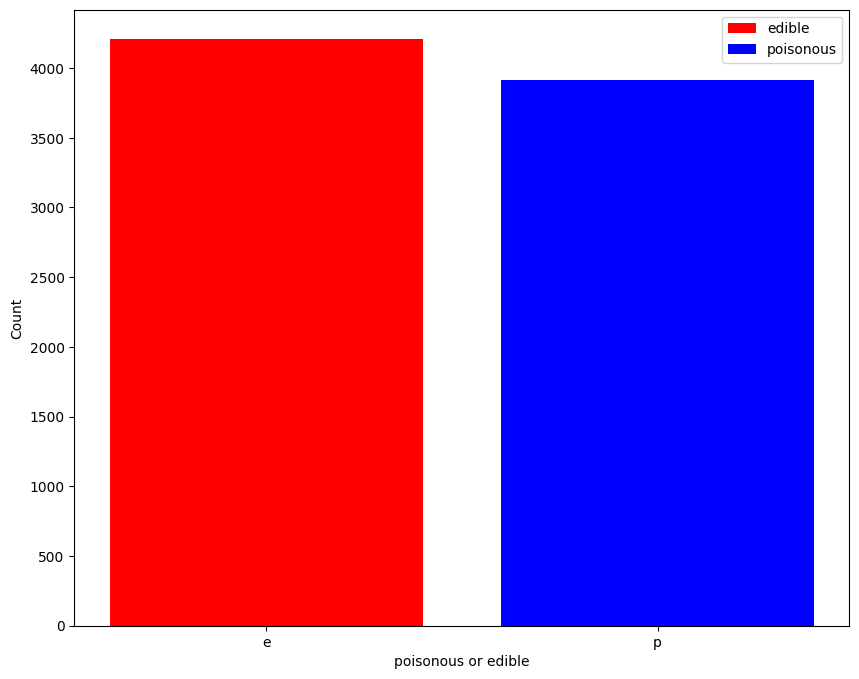

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 8))
plt.bar(df['class'].value_counts().index, df['class'].value_counts(),  color = ['red', 'blue'], label = ['edible', 'poisonous'])
plt.xlabel('poisonous or edible')
plt.ylabel('Count')
plt.legend()

### shape of dataset

In [4]:
print('No. of rows: ', df.shape[0])
print('No. of columns: ', df.shape[1])

No. of rows:  8124
No. of columns:  23


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Attribute Information

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for columns in df.columns:
    df[columns] = le.fit_transform(df[columns])

In [9]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


### Feature Values as X and Level values as y

In [10]:
X = df.drop('class', axis = 1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [11]:
y = df['class']
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

## Applying PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
pca_fit = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.33758733 0.16581098 0.12285821 0.06796611 0.05831173 0.05092539
 0.04670841]


In [13]:
print(sum(pca.explained_variance_ratio_))

0.8501681635086188


### Splitting the Dataset into Training and Testing Set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_fit, y, test_size = 0.2, random_state = 42)

### Training Models

In [15]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [16]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [17]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [18]:
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
model_random_forest = RandomForestClassifier()
model_random_forest.fit(X_train, y_train)

RandomForestClassifier()

### Score of each Model

In [20]:
print('Linear Regression: ', model_linear.score(X_test, y_test))
print('Logistic Regression: ', model_logistic.score(X_test, y_test))
print('Support Vector Machine: ', model_svc.score(X_test, y_test))
print('Decision Tree Classifier: ', model_decision_tree.score(X_test, y_test))
print('Random Forest Classifier: ', model_random_forest.score(X_test, y_test))

Linear Regression:  0.41284994002667297
Logistic Regression:  0.8344615384615385
Support Vector Machine:  0.952
Decision Tree Classifier:  0.9772307692307692
Random Forest Classifier:  0.9975384615384615


### Prediction of Test data 

In [21]:
import numpy as np
y_predict1 = model_linear.predict(X_test)
y_predict1 = y_predict1.astype(int)

In [22]:
y_predict2 = model_logistic.predict(X_test)
y_predict2

array([0, 1, 1, ..., 1, 1, 1])

In [23]:
y_predict3 = model_svc.predict(X_test)
y_predict3

array([0, 1, 1, ..., 1, 1, 1])

In [24]:
y_predict4 = model_decision_tree.predict(X_test)
y_predict4

array([0, 1, 1, ..., 1, 1, 1])

In [25]:
y_predict5 = model_random_forest.predict(X_test)
y_predict5

array([0, 1, 1, ..., 1, 1, 1])

### Finding Accuracy Score by evaluating every Algorithm

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy of Linear Regression: ', accuracy_score(y_test, y_predict1))
print('Accuracy of Logistic Regression: ', accuracy_score(y_test, y_predict2))
print('Accuracy of Support Vector Machine: ', accuracy_score(y_test, y_predict3))
print('Accuracy of Decision Tree Classifier: ', accuracy_score(y_test, y_predict4))
print('Accuracy of Random Forest Classifier: ', accuracy_score(y_test, y_predict5))

Accuracy of Linear Regression:  0.571076923076923
Accuracy of Logistic Regression:  0.8344615384615385
Accuracy of Support Vector Machine:  0.952
Accuracy of Decision Tree Classifier:  0.9772307692307692
Accuracy of Random Forest Classifier:  0.9975384615384615


In [27]:
predicted = pd.DataFrame({'Models' : ['Linear Regression', 'LogisticRegression', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier'],
                          'Accuracy Score' : [accuracy_score(y_test, y_predict1) * 100,
                                              accuracy_score(y_test, y_predict2) * 100,
                                              accuracy_score(y_test, y_predict3) * 100,
                                              accuracy_score(y_test, y_predict4) * 100,
                                              accuracy_score(y_test, y_predict5) * 100]})
predicted

,Models,Accuracy Score
0,Linear Regression,57.107692
1,LogisticRegression,83.446154
2,Support Vector Machine,95.200000
3,Decision Tree Classifier,97.723077
4,Random Forest Classifier,99.753846


<Axes: xlabel='Models', ylabel='Accuracy Score'>

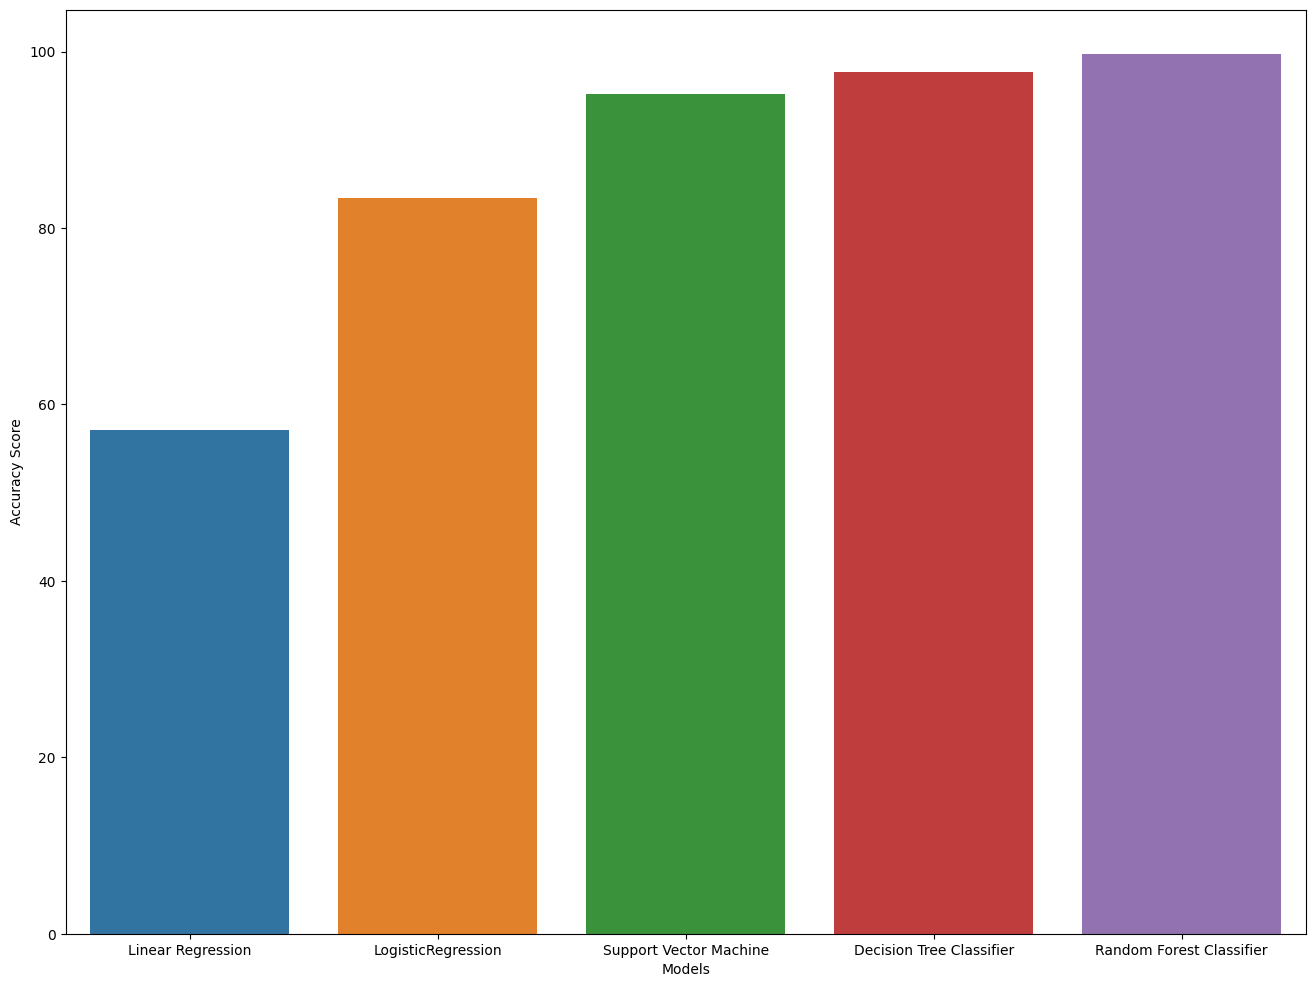

In [28]:
plt.figure(figsize = (16, 12))
sns.barplot(data = predicted, x = predicted.Models, y = predicted['Accuracy Score'])

* ## Project Description:
    
    
    
    
    *   This Project is to classify the mushrooms are whether edible are poisonous.
    *   In the dataset there are 8124 rows and 23 columns.
    *   Every column possesses categorical data.
    *   Hence, using label encoder from sci-kit learn converted those categorical values to continuous values.
    *   Later, used **PCA(Principal Component Analysis)** to help the models to consider only the needed columns from the               dataset.
    *   Splitted the data into training set and testing set in the composition of 80% and 20% respectively.
    *   Initialised five supervised machine learning algorithms i.e., **Linear Regression, LogisticRegression, Support             Vector Machine, Decision Tree Classifier, Random Forest Classifier** .
    *   By using **Linear Regression model** , the score is: **57.10%**.
    *   By using **Logistic Regression model** , the score is: **83.44%**.
    *   By using **Support Vector Machine model** , the score is: **95.20%**.
    *   By using **Decision Tree Classifier model** , the score is: **97.84%**.
    *   By using **Random Forest Classifier model** , the score is: **99.63%**.
    *   Hence, from the analysis, for the data I considered, **Random forest classifier model** is best suitable.